In [64]:
import tensorflow as tf
import os
import matplotlib.pyplot as plt
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator
import glob
import pandas as pd
import numpy as np
import math


In [2]:

class FalseDict(object):
    def __getitem__(self,key):
        return 0
    def __contains__(self, key):
        return True

In [3]:
#move up in directory
os.chdir('../tensorboard')

In [4]:
os.getcwd()

'C:\\Users\\deniz\\Desktop\\PhD\\p1_generalization\\tensorboard'

In [54]:
# CONFIG
#'lstm2_a2c_nh_48_lr_0_0001_n_u_p_0_5_ew_0_vw_0_5_dr_0_5_res_d_f_p_0_1_rt_con_a_4_n_300_te_50000_id_{}'
lstm_file_name = 'lstm2_a2c_nh_48_lr_0_0001_n_u_p_0_5_ew_0_vw_0_5_dr_0_5_res_d_f_p_0_1_rt_con_a_4_n_300_te_50000_id_{}'

rnn_file_name = 'rnn_a2c_nh_48_lr_0_0001_n_u_p_0_5_ew_0_vw_0_5_dr_0_5_res_d_f_p_0_1_rt_con_a_4_n_300_te_50000_id_{}'

num_ids = 30

In [31]:
def get_tensorboard_data(file_name, num_ids): 
    
    # container
    d = {
    'w_times':[],
    'step_nums':[],
    'vals':[]
    }

    for id_ in range(num_ids):
        # find most recent tfevents file
        list_of_files = glob.glob(os.path.join(file_name.format(id_), '*')) # * means all if need specific format then *.csv
        latest_file = max(list_of_files, key=os.path.getctime)
        
        # get tensorboard data
        event_acc = EventAccumulator(latest_file,
                                    size_guidance=FalseDict())
        event_acc.Reload()
        w_times, step_nums, vals  = zip(*event_acc.Scalars('Perf/Reward'))
        
        d['w_times'].extend(w_times)
        d['step_nums'].extend(step_nums)
        d['vals'].extend(vals)
        
    
    return d
                
    

In [65]:
def smooth(scalars, weight):
    """
    EMA implementation according to
    https://github.com/tensorflow/tensorboard/blob/34877f15153e1a2087316b9952c931807a122aa7/tensorboard/components/vz_line_chart2/line-chart.ts#L699
    """
    last = 0
    smoothed = []
    num_acc = 0
    for next_val in scalars:
        last = last * weight + (1 - weight) * next_val
        num_acc += 1
        # de-bias
        debias_weight = 1
        if weight != 1:
            debias_weight = 1 - math.pow(weight, num_acc)
        smoothed_val = last / debias_weight
        smoothed.append(smoothed_val)

    return smoothed

In [37]:
rnn_data = get_tensorboard_data(rnn_file_name, num_ids)
lstm_data = get_tensorboard_data(lstm_file_name, num_ids)

In [46]:
rnn_df = pd.DataFrame(rnn_data)
lstm_df = pd.DataFrame(lstm_data)

rnn_means = rnn_df.groupby('step_nums').mean().vals
lstm_means = lstm_df.groupby('step_nums').mean().vals

ERROR! Session/line number was not unique in database. History logging moved to new session 42


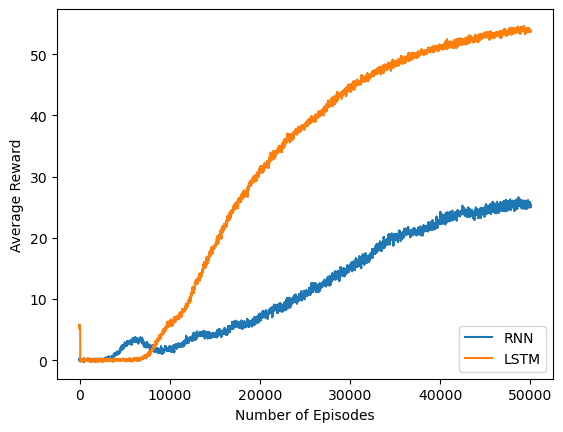

In [88]:
plt.plot(rnn_df.groupby('step_nums').mean().vals)
plt.plot(lstm_df.groupby('step_nums').mean().vals)
plt.xlabel("Number of Episodes")
plt.ylabel("Average Reward")
plt.legend(["RNN", "LSTM"], loc ="lower right")
plt.savefig('../plots/training_loss_plot')

# Test convergence for LSTMs with different number of hidden units

In [89]:
lstm48_file_name = 'lstm2_a2c_nh_48_lr_0_0001_n_u_p_0_5_ew_0_vw_0_5_dr_0_5_res_d_f_p_0_1_rt_con_a_4_n_300_te_50000_id_{}'
lstm64_file_name = 'lstm2_a2c_nh_64_lr_0_0001_n_u_p_0_5_ew_0_vw_0_5_dr_0_5_res_d_f_p_0_1_rt_con_a_4_n_300_te_50000_id_{}'
lstm80_file_name = 'lstm2_a2c_nh_80_lr_0_0001_n_u_p_0_5_ew_0_vw_0_5_dr_0_5_res_d_f_p_0_1_rt_con_a_4_n_300_te_50000_id_{}'
lstm96_file_name = 'lstm2_a2c_nh_96_lr_0_0001_n_u_p_0_5_ew_0_vw_0_5_dr_0_5_res_d_f_p_0_1_rt_con_a_4_n_300_te_50000_id_{}'


ERROR! Session/line number was not unique in database. History logging moved to new session 51


In [ ]:
lstm_data48 = get_tensorboard_data(lstm48_file_name, num_ids)
lstm_data64 = get_tensorboard_data(lstm64_file_name, num_ids)
lstm_data80 = get_tensorboard_data(lstm80_file_name, num_ids)
lstm_data96 = get_tensorboard_data(lstm96_file_name, num_ids)

ERROR! Session/line number was not unique in database. History logging moved to new session 52


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\deniz\AppData\Local\anaconda3\envs\rnn\lib\site-packages\IPython\core\interactiveshell.py", line 3457, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\deniz\AppData\Local\Temp\ipykernel_14000\2244589171.py", line 1, in <module>
    lstm_data48 = get_tensorboard_data(lstm48_file_name, num_ids)
  File "C:\Users\deniz\AppData\Local\Temp\ipykernel_14000\2745789380.py", line 18, in get_tensorboard_data
    event_acc.Reload()
  File "C:\Users\deniz\AppData\Local\anaconda3\envs\rnn\lib\site-packages\tensorboard\backend\event_processing\event_accumulator.py", line 229, in Reload
    for event in self._generator.Load():
  File "C:\Users\deniz\AppData\Local\anaconda3\envs\rnn\lib\site-packages\tensorboard\backend\event_processing\event_file_loader.py", line 94, in Load
    for record in super(EventFileLoader, self).Load():
  File "C:\Users\deniz\AppData\Local\anaconda3\envs\rnn\lib\site-packages\tensorboard\ba

In [91]:
lstm_data96 = get_tensorboard_data(lstm96_file_name, num_ids)

ERROR! Session/line number was not unique in database. History logging moved to new session 56


In [92]:
lstm48_df = pd.DataFrame(lstm_data48)
lstm64_df = pd.DataFrame(lstm_data64)
lstm80_df = pd.DataFrame(lstm_data80)
lstm96_df = pd.DataFrame(lstm_data96)



lstm48_means = lstm48_df.groupby('step_nums').mean().vals
lstm64_means = lstm64_df.groupby('step_nums').mean().vals
lstm80_means = lstm80_df.groupby('step_nums').mean().vals
lstm96_means = lstm96_df.groupby('step_nums').mean().vals

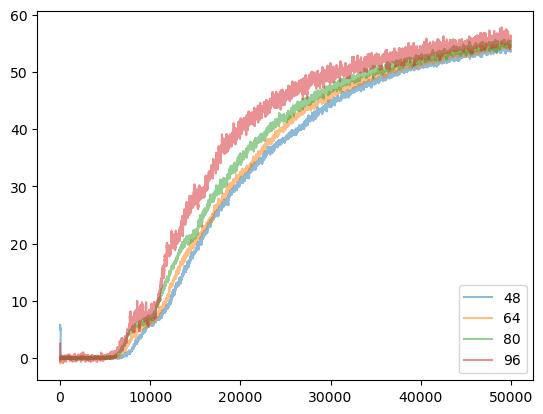

In [100]:
plt.plot(lstm48_means, alpha = 0.5)
plt.plot(lstm64_means, alpha = 0.5)
plt.plot(lstm80_means, alpha = 0.5)
plt.plot(lstm96_means, alpha = 0.5)

plt.legend(["48", "64", "80", "96"], loc ="lower right")
